# Descripción del data set Financial data of 4400+ public companies

✅ ¿Qué es?

Se trata de un conjunto de datos que contiene información financiera de más de 4 400 empresas públicas.  

Los datos fueron raspados (“scraped”) de Yahoo Finance, lo que incluye los estados financieros — el balance general (“balance sheet”), el estado de resultados (“income statement”), y el flujo de caja (“cash flow statement”).  

Incluye datos tanto anuales como trimestrales para un período reciente (aproximadamente los últimos 4 años) para cada empresa.  


# ¿Qué contiene exactamente?

Algunas de las características clave de la base de datos:

- Cada empresa viene identificada con su ticker o símbolo bursátil (o equivalente) y posiblemente con su nombre, industria, etc.
- Para cada empresa, los datos incluyen:
    - Estado de resultados: ingresos, beneficios, gastos, etc.
    - Balance general: activos, pasivos, capital contable, etc.
    - Flujo de caja: flujos operativos, de inversión, de financiación, etc.
- Los datos están organizados para que puedas ver la evolución por trimestre y por año, lo que permite análisis de tendencias.
- Se pueden usar variables financieras como predictors (por ejemplo: activos, pasivos, ingresos) y variables objetivo como beneficio, rentabilidad, crecimiento, etc.

# Paso 1 — Reconocer el dataset

1. Objetivo: investigar el dataset entregado en la asignación 2, revisar el nombre de cada columna y documentar qué representa cada una (tipo, unidad, periodicidad, observaciones).

2. Pasos recomendados:
    - Cargar el archivo entregado (por ejemplo: df = pd.read_csv(...)) y listar columnas: df.columns
    - Para cada columna: buscar su significado (glosario, documentación de la fuente, o inspección de valores).
    - Anotar tipo de dato, unidad (USD, porcentaje, entero), periodicidad (trimestral/anual) y cualquier observación (por ejemplo: calculada, acumulada, neta/bruta).
    - Generar la lista final con nombre y descripción clara y breve.

3. Ejemplo de Plantilla para la lista (reemplazar con las columnas reales del dataset):

- ticker: Identificador bursátil de la empresa (string). Ejemplo: "AAPL".
- fiscal_date: Fecha del periodo financiero (YYYY-MM-DD). Indica el cierre del trimestre/año.
- revenue: Ingresos netos durante el periodo (num, USD). Periodicidad: trimestral/anual.
- gross_profit: Beneficio bruto (num, USD). Definición: ingresos menos costo de ventas.
- operating_income: Resultado operativo (num, USD). Incluye gastos operativos.
- net_income: Beneficio neto después de impuestos (num, USD).


4. Resultado esperado:
    - Un listado documentado con cada columna del dataset y su descripción (puede entregarse como tabla o como lista de pares nombre→descripción).

In [ ]:
import pandas as pd

df = pd.read_csv("balanceSheetHistory_annually.csv")
print("Shape:", df.shape)

display(df.head())                                  # primeras filas
display(df.dtypes.to_frame("dtype"))                # tipos de datos

num_df = df.select_dtypes(include="number")
print("\nResumen numérico:")
display(num_df.describe().T)

df["endDate"] = pd.to_datetime(df["endDate"], errors="coerce")
df = df.dropna(subset=["endDate", "cash"]).copy()
df = df.sort_values(["stock", "endDate"]).reset_index(drop=True)

print("\nStocks distintos:", df["stock"].nunique())
print("Rango de fechas:", df["endDate"].min().date(), "→", df["endDate"].max().date())

nulls = df.isna().sum()
print("\nNulos por columna (>0):")
display(nulls[nulls > 0].sort_values(ascending=False))



Shape: (17511, 31)


,stock,endDate,accountsPayable,inventory,longTermDebt,netReceivables,netTangibleAssets,longTermInvestments,totalCurrentAssets,propertyPlantEquipment,...,totalAssets,otherCurrentLiab,deferredLongTermLiab,totalStockholderEquity,totalLiab,capitalSurplus,intangibleAssets,shortTermInvestments,shortLongTermDebt,minorityInterest
0,IVC,2019-12-31,88003000.0,121184000.0,219464000.0,140013000.0,-91334000.0,85000.0,355877000.0,92183000.0,...,8.521260e+08,21634000.0,602000.0,308516000.0,543610000.0,312650000.0,26447000.0,NaN,NaN,NaN
1,IVC,2018-12-31,92469000.0,128644000.0,225733000.0,138476000.0,-48632000.0,90000.0,397410000.0,74306000.0,...,8.858550e+08,22750000.0,402000.0,359147000.0,526708000.0,297919000.0,26506000.0,NaN,NaN,NaN
2,IVC,2017-12-31,90566000.0,121933000.0,241405000.0,143464000.0,-8233000.0,103000.0,456914000.0,80016000.0,...,1.066033e+09,34119000.0,787000.0,423294000.0,642739000.0,290125000.0,30244000.0,NaN,NaN,NaN
3,IVC,2016-12-31,88236000.0,135644000.0,146088000.0,132707000.0,32762000.0,108000.0,409072000.0,75359000.0,...,9.037430e+08,33800000.0,793000.0,422387000.0,481356000.0,266151000.0,29023000.0,NaN,NaN,NaN
4,CSLT,2019-12-31,19596000.0,NaN,NaN,31397000.0,68911000.0,NaN,95470000.0,18762000.0,...,2.427840e+08,18768000.0,21429000.0,172874000.0,69910000.0,627899000.0,NaN,16411000.0,NaN,NaN


,dtype
stock,object
endDate,object
accountsPayable,float64
inventory,float64
longTermDebt,float64
netReceivables,float64
netTangibleAssets,float64
longTermInvestments,float64
totalCurrentAssets,float64
propertyPlantEquipment,float64



Resumen numérico:


,count,mean,std,min,25%,50%,75%,max
accountsPayable,16415.0,3.431181e+09,4.864555e+10,8.800000e+01,4955000.0,3.883900e+07,2.861095e+08,1.635858e+12
inventory,9640.0,5.397221e+08,2.193146e+09,3.000000e+03,7293750.0,5.148450e+07,2.978500e+08,7.662200e+10
longTermDebt,11222.0,3.464196e+09,1.410168e+10,1.282000e+03,101489500.0,5.471190e+08,2.126692e+09,3.342920e+11
netReceivables,14544.0,9.128711e+08,5.844426e+09,3.500000e+01,11885750.0,7.444950e+07,3.557384e+08,1.882320e+11
netTangibleAssets,17351.0,9.131987e+08,9.562153e+09,-1.261080e+11,1864947.5,1.115000e+08,5.735550e+08,1.917940e+11
longTermInvestments,7499.0,4.354567e+09,2.921496e+10,1.000000e+00,30183000.0,1.716000e+08,8.299700e+08,5.452370e+11
totalCurrentAssets,17331.0,3.544844e+09,3.534564e+10,8.200000e+01,53566500.0,2.290220e+08,9.501485e+08,1.181001e+12
propertyPlantEquipment,15768.0,2.075143e+09,9.406400e+09,7.000000e+00,12212423.0,1.024635e+08,7.545180e+08,2.596510e+11
otherStockholderEquity,12046.0,-2.280976e+08,1.744640e+09,-3.717000e+10,-78990000.0,-5.967500e+06,-4.107375e+04,3.381500e+10
deferredLongTermAssetCharges,6055.0,2.590617e+08,1.487030e+09,3.000000e+03,4165000.0,1.775000e+07,8.100000e+07,5.119400e+10



Stocks distintos: 4274
Rango de fechas: 2013-12-31 → 2020-05-02

Nulos por columna (>0):


deferredLongTermLiab            14340
shortTermInvestments            13071
minorityInterest                12532
shortLongTermDebt               11513
deferredLongTermAssetCharges    10885
longTermInvestments              9726
inventory                        7331
goodWill                         7295
longTermDebt                     5942
otherCurrentAssets               5847
intangibleAssets                 5744
otherStockholderEquity           4931
treasuryStock                    4029
otherCurrentLiab                 3920
otherLiab                        2899
netReceivables                   2758
capitalSurplus                   2668
otherAssets                      1384
propertyPlantEquipment           1273
retainedEarnings                 1199
commonStock                       984
accountsPayable                   737
totalCurrentLiabilities            26
totalLiab                          20
netTangibleAssets                   3
dtype: int64

# Paso 2 — Seleccionar columnas relevantes

Después de haber cargado el dataset, elimina todas las columnas y quédate solo con: `stock`, `endDate` y `cash`.

- Verifica que los nombres y la capitalización de las columnas sean correctos antes de seleccionar.


In [ ]:
# Seleccionar columnas relevantes (stock, endDate, cash)

# 1) Subset mínimo
use_cols = ["stock", "endDate", "cash"]
data = df.loc[:, use_cols].copy()

# 2) Asegurar tipos y valores válidos
data["cash"] = pd.to_numeric(data["cash"], errors="coerce")
data = data.dropna(subset=["endDate", "cash"])

# 3) Quitar duplicados por empresa-fecha (si los hay)
before = len(data)
data = data.drop_duplicates(subset=["stock", "endDate"], keep="last").reset_index(drop=True)
print(f"Filas tras limpieza: {len(data)} (eliminadas {before - len(data)})")

# 4) Vistazos rápidos
display(data.head())
print("\nResumen de 'cash':")
display(data["cash"].describe().to_frame())

print("\nFilas por empresa (top 15):")
counts = data.groupby("stock").size().sort_values(ascending=False).to_frame("rows")
display(counts.head(15))

# 5) Guardar base para los siguientes pasos
data.to_csv("reg_base_stock_endDate_cash.csv", index=False)



Filas tras limpieza: 16929 (eliminadas 0)


,stock,endDate,cash
0,A,2016-10-31,2.289000e+09
1,A,2017-10-31,2.678000e+09
2,A,2018-10-31,2.247000e+09
3,A,2019-10-31,1.382000e+09
4,AA,2016-12-31,8.530000e+08



Resumen de 'cash':


,cash
count,1.692900e+04
mean,6.928746e+08
std,7.095478e+09
min,1.900000e+01
25%,1.397300e+07
50%,6.096300e+07
75%,2.307520e+08
max,3.858230e+11



Filas por empresa (top 15):


,rows
stock,
ZYXI,4
A,4
ZIXI,4
ZIOP,4
ZION,4
ZGNX,4
ZG,4
ZFGN,4
ZEUS,4


# Paso 3 — Separar por empresas y elegir 3 para predecir su cantidad de dinero por fecha

- Objetivo: crear series temporales por empresa usando las columnas `stock`, `endDate` y `cash` y seleccionar 3 empresas para modelar y predecir `cash` por fecha.
- Pasos recomendados:
    - Verificar que las columnas `stock`, `endDate` y `cash` existen y están limpias (sin valores nulos o con imputación cuando sea necesario).
    - Ordenar el dataframe por `stock` y `endDate` (ascendente) para obtener la serie temporal de cada empresa.
    - Agrupar por `stock` y crear un subset por empresa.
    - Elegir 3 empresas con suficientes observaciones (p. ej. mayor número de fechas disponibles o relevancia del negocio).
    - Para cada empresa seleccionada, preparar los datos de entrenamiento/validación (features temporales, ventanas, lag, etc.) y definir la variable objetivo `cash` por `endDate`.

In [ ]:

N_STOCKS = 3
PREFERRED_MIN = [6, 5, 4, 3, 2]   # intentamos este orden de umbrales
TICKERS = []  # si quieres forzar algunas: ["AAPL","MSFT","GOOGL"]

# Conteo por empresa
counts = (data.groupby("stock")
          .size()
          .rename("rows")
          .sort_values(ascending=False))
display(counts.head(20))

# Elegir el mayor umbral posible que deje al menos N_STOCKS empresas
threshold = None
for m in PREFERRED_MIN:
    if (counts >= m).sum() >= N_STOCKS:
        threshold = m
        break

if threshold is None:
    # No hay suficientes empresas con al menos 2 registros,
    # tomamos el top N_STOCKS con lo que exista (habrá advertencia)
    threshold = int(counts.min())
    print(f"⚠️ No hay {N_STOCKS} empresas con ≥2 registros. "
          f"Usaremos el top {N_STOCKS} con el mínimo existente (min={threshold}).")

valid = counts[counts >= threshold]
print(f"\nUmbral elegido: ≥{threshold} filas por empresa")
print(f"Empresas válidas disponibles: {len(valid)}")

# Resolver TICKERS: usar los indicados si existen y completamos con los top válidos
if TICKERS:
    TICKERS = [t for t in TICKERS if t in valid.index]
    if len(TICKERS) < N_STOCKS:
        faltan = [t for t in valid.index if t not in TICKERS]
        TICKERS = (TICKERS + faltan)[:N_STOCKS]
else:
    TICKERS = valid.index[:N_STOCKS].tolist()

print("Empresas seleccionadas:", TICKERS)

# Subset y orden
data_3 = (data[data["stock"].isin(TICKERS)]
          .sort_values(["stock", "endDate"])
          .reset_index(drop=True))

# Resumen
summary = (data_3.groupby("stock")
           .agg(rows=("endDate","size"),
                start=("endDate","min"),
                end=("endDate","max"),
                cash_min=("cash","min"),
                cash_max=("cash","max"))
           .sort_values("rows", ascending=False))
display(summary)

# Guardar
data_3.to_csv("reg_data_3stocks.csv", index=False)
print("Guardado: reg_data_3stocks.csv")



stock
ZYXI    4
A       4
ZIXI    4
ZIOP    4
ZION    4
ZGNX    4
ZG      4
ZFGN    4
ZEUS    4
ZEN     4
ZBRA    4
ZBH     4
ZAGG    4
Z       4
YUMC    4
YUM     4
YTEN    4
YRCW    4
ACHV    4
ACHC    4
Name: rows, dtype: int64


Umbral elegido: ≥4 filas por empresa
Empresas válidas disponibles: 4140
Empresas seleccionadas: ['ZYXI', 'A', 'ZIXI']


,rows,start,end,cash_min,cash_max
stock,,,,,
A,4,2016-10-31,2019-10-31,1.382000e+09,2.678000e+09
ZIXI,4,2016-12-31,2019-12-31,1.334900e+07,3.300900e+07
ZYXI,4,2016-12-31,2019-12-31,2.470000e+05,1.404000e+07


Guardado: reg_data_3stocks.csv


# Paso 4 — Grafique tiempo vs dinero de las 3 empresas en 3 gráficas diferentes

Objetivo: visualizar la serie temporal de `cash` frente a `endDate` para cada una de las 3 empresas seleccionadas, colocando cada empresa en una gráfica independiente.

Pasos recomendados:
- Asegurarse de tener el DataFrame con las columnas `stock`, `endDate` y `cash` y ordenado por `stock` y `endDate` ascendente.
- Convertir `endDate` a tipo fecha: `df['endDate'] = pd.to_datetime(df['endDate'])`.
- Seleccionar las 3 empresas elegidas: p. ej. `stocks = ['AAA','BBB','CCC']` y crear un subset por cada `stock`.
- Para cada empresa, graficar `endDate` en el eje x y `cash` en el eje y en una figura separada.
- Configurar títulos, etiquetas de ejes y formato de fechas (rotar etiquetas si es necesario). Añadir grid y leyenda si procede.
- Opcional: usar subplots (3 filas x 1 columna) para mostrar las 3 gráficas en la misma figura o generar 3 figuras individuales según preferencia.
- Guardar las figuras si es necesario: `plt.savefig('cash_stock_AAA.png', bbox_inches='tight')`.

Ejemplo de librerías a usar: matplotlib, seaborn o plotly para interactividad.

Graficando: ['A', 'ZIXI', 'ZYXI']


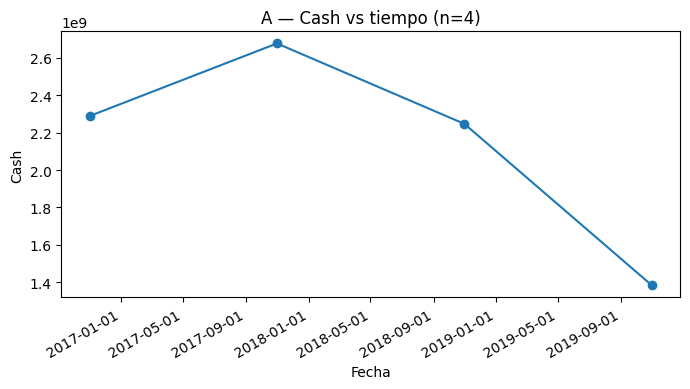

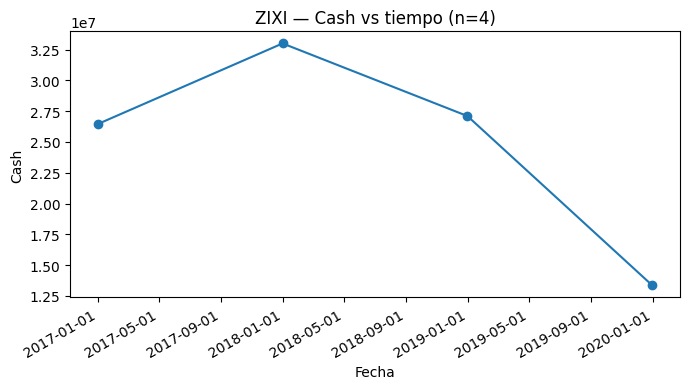

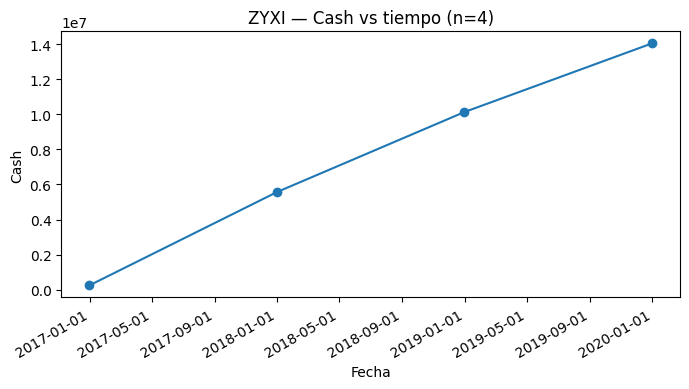

Guardados: ['plot_cash_A.png', 'plot_cash_ZIXI.png', 'plot_cash_ZYXI.png']


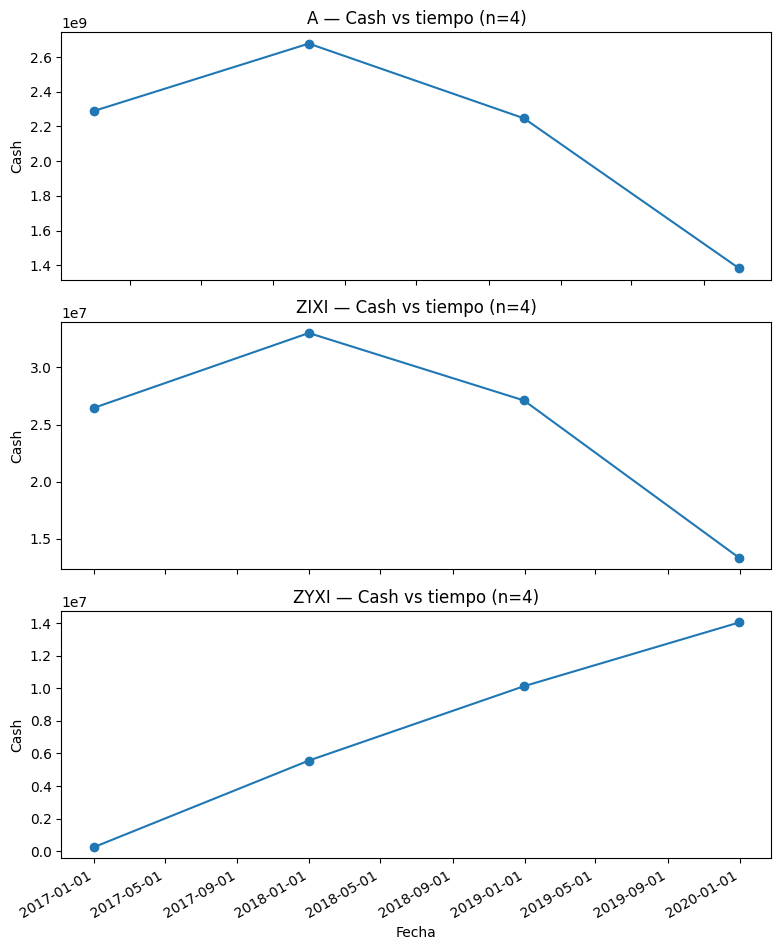

Panel guardado: plots_cash_all.png


In [7]:
# PASO 4 — Graficar cash vs tiempo 

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# 1) Obtener data_3 (del paso 3) o cargar desde disco
if "data_3" not in globals():
    data_3 = pd.read_csv("reg_data_3stocks.csv", parse_dates=["endDate"])

# 2) Tickers a graficar
TICKERS = list(dict.fromkeys(data_3["stock"].tolist()))  # respeta orden
print("Graficando:", TICKERS)

# 3) Gráficas individuales
saved = []
for t in TICKERS:
    tmp = (data_3[data_3["stock"] == t]
           .sort_values("endDate")
           .reset_index(drop=True))

    fig, ax = plt.subplots(figsize=(7, 4))
    ax.plot(tmp["endDate"], tmp["cash"], marker="o")
    ax.set_title(f"{t} — Cash vs tiempo (n={len(tmp)})")
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Cash")
    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
    fig.autofmt_xdate()
    plt.tight_layout()

    out = f"plot_cash_{t}.png"
    fig.savefig(out, dpi=150)
    plt.show()
    saved.append(out)

print("Guardados:", saved)

# 4) Panel combinado (si hay 2+)
if len(TICKERS) >= 2:
    n = len(TICKERS)
    fig, axes = plt.subplots(n, 1, figsize=(8, 3.2*n), sharex=False)
    if n == 1:
        axes = [axes]

    for ax, t in zip(axes, TICKERS):
        tmp = (data_3[data_3["stock"] == t]
               .sort_values("endDate")
               .reset_index(drop=True))
        ax.plot(tmp["endDate"], tmp["cash"], marker="o")
        ax.set_title(f"{t} — Cash vs tiempo (n={len(tmp)})")
        ax.set_ylabel("Cash")
        ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
        fig.autofmt_xdate()

    axes[-1].set_xlabel("Fecha")
    plt.tight_layout()
    panel_out = "plots_cash_all.png"
    fig.savefig(panel_out, dpi=150)
    plt.show()
    print("Panel guardado:", panel_out)


# Paso 5 — División 80/20 (entrenamiento / prueba)

Objetivo: separar los datos en 80% para entrenamiento y 20% para prueba respetando la estructura temporal por empresa (sin hacer shuffle).

Recomendaciones:
- Asegúrate de tener las columnas `stock`, `endDate` y `cash` y que el dataframe esté ordenado por `stock` y `endDate` (ascendente).
- Para series temporales por empresa, usa una división basada en tiempo: los primeros 80% de observaciones de cada `stock` → train; los últimos 20% → test.



In [8]:
# PASO 5 — Separar 80% train / 20% test por empresa (orden temporal)

import numpy as np
import pandas as pd

# 1) Obtener data_3 si no está en memoria
if "data_3" not in globals():
    data_3 = pd.read_csv("reg_data_3stocks.csv", parse_dates=["endDate"])

# Asegurar orden temporal
data_3 = data_3.sort_values(["stock", "endDate"]).reset_index(drop=True)

parts = []
alerts = []

for stock_id, grp in data_3.groupby("stock", sort=False):
    tmp = grp.sort_values("endDate").reset_index(drop=True).copy()
    n = len(tmp)

    # corte inicial 80%
    cut = int(np.floor(0.8 * n))
    # Asegurar al menos 1 de test
    cut = max(1, min(cut, n - 1))
    # Si es posible, intenta dejar ≥2 de train
    if n >= 3 and cut < 2:
        cut = 2

    if n < 2:
        alerts.append(f"{stock_id}: sólo {n} fila(s); no se puede 80/20. Todo queda en train.")
        tmp["split"] = "train"
    else:
        tmp["split"] = "train"
        tmp.loc[cut:, "split"] = "test"

    parts.append(tmp)

dataset = pd.concat(parts, ignore_index=True)

# 2) Resumen de tamaños
print("Conteos por empresa y split:")
display(dataset.groupby(["stock", "split"]).size().to_frame("rows"))

if alerts:
    print("\n⚠️ Avisos:")
    for a in alerts:
        print(" -", a)

# 3) Guardar conjuntos
dataset.to_csv("reg_dataset_80_20.csv", index=False)
dataset.query("split == 'train'").to_csv("train_80_20.csv", index=False)
dataset.query("split == 'test'").to_csv("test_80_20.csv", index=False)
print("\nGuardados:")
print(" - reg_dataset_80_20.csv (todo)")
print(" - train_80_20.csv")
print(" - test_80_20.csv")

# 4) Vista rápida de los extremos temporales por empresa
edge = (dataset.groupby(["stock", "split"])
               .agg(n=("endDate", "size"),
                    start=("endDate", "min"),
                    end=("endDate", "max"))
               .reset_index()
       )
display(edge.sort_values(["stock", "split"]))


Conteos por empresa y split:


rows
stock split      
A     test      1
      train     3
ZIXI  test      1
      train     3
ZYXI  test      1
      train     3


Guardados:
 - reg_dataset_80_20.csv (todo)
 - train_80_20.csv
 - test_80_20.csv


,stock,split,n,start,end
0,A,test,1,2019-10-31,2019-10-31
1,A,train,3,2016-10-31,2018-10-31
2,ZIXI,test,1,2019-12-31,2019-12-31
3,ZIXI,train,3,2016-12-31,2018-12-31
4,ZYXI,test,1,2019-12-31,2019-12-31
5,ZYXI,train,3,2016-12-31,2018-12-31


# Paso 6 — crea y entrena el modelo de regresión lineal para predecir `cash` por empresa

Objetivo: entrenar un modelo de regresión lineal por cada `stock` usando la serie temporal (respetando orden temporal) y evaluar en el 20% final.

Pasos recomendados:
- Preprocesamiento
    - Definir variables para el entrenamiento: y = `cash` (variable objetivo). `data` → X (conjunto de características a usar para predecir `cash`, p. ej. rezagos de `cash`, indicadores temporales, variables exógenas). Usar X e y en el entrenamiento: `model.fit(X_train, y_train)`.
    - Asegurar `endDate` como datetime y ordenar por `stock`, `endDate`.  - Asegurar `endDate` como datetime y ordenar por `stock`, `endDate`.



In [10]:
#codi# PASO 6 — Entrenar regresión lineal por empresa y predecir en test

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 1) Cargar el dataset del paso 5 si no está en memoria
if "dataset" not in globals():
    dataset = pd.read_csv("reg_dataset_80_20.csv", parse_dates=["endDate"])

# 2) Convertir fecha a número (ordinal) para usarla como X
dataX = dataset.copy()
dataX["x"] = dataX["endDate"].map(pd.Timestamp.toordinal).astype(float)

models_info = []
preds_list  = []

stocks = list(dict.fromkeys(dataX["stock"]))
print("Stocks a entrenar:", stocks)

for t in stocks:
    sub  = dataX[dataX["stock"] == t].sort_values("endDate").reset_index(drop=True)
    tr   = sub[sub["split"] == "train"].copy()
    te   = sub[sub["split"] == "test" ].copy()
    ntr, nte = len(tr), len(te)

    used_baseline = False
    coef_, intercept_ = np.nan, np.nan

    if ntr >= 2:
        # Entrenar regresión lineal
        lr = LinearRegression()
        lr.fit(tr[["x"]].to_numpy(), tr["cash"].to_numpy())
        coef_      = float(lr.coef_[0])
        intercept_ = float(lr.intercept_)
        # Predecir si hay test
        if nte > 0:
            te["y_pred"] = lr.predict(te[["x"]].to_numpy())
            preds_list.append(te[["stock", "endDate", "cash", "y_pred"]])
    elif ntr == 1:
        # Baseline con el único valor de train
        used_baseline = True
        if nte > 0:
            te["y_pred"] = float(tr["cash"].iloc[0])
            preds_list.append(te[["stock", "endDate", "cash", "y_pred"]])
    else:
        # Sin train (raro): no se puede entrenar ni predecir
        used_baseline = True
        # no hay predicciones

    models_info.append({
        "stock": t,
        "n_train": ntr,
        "n_test": nte,
        "coef": coef_,
        "intercept": intercept_,
        "baseline_if_true": used_baseline
    })

# 3) Consolidar y guardar
model_summary = pd.DataFrame(models_info).sort_values("stock")
display(model_summary)

if preds_list:
    preds_df = pd.concat(preds_list, ignore_index=True).sort_values(["stock", "endDate"])
    display(preds_df.head(10))
    preds_df.to_csv("reg_predictions_test.csv", index=False)
    print("Guardado: reg_predictions_test.csv")
else:
    print("No se generaron predicciones (no hubo filas de test).")

model_summary.to_csv("reg_model_summary.csv", index=False)
print("Guardado: reg_model_summary.csv")


Stocks a entrenar: ['A', 'ZIXI', 'ZYXI']


,stock,n_train,n_test,coef,intercept,baseline_if_true
0,A,3,1,-57534.246575,4.478629e+10,False
1,ZIXI,3,1,893.150685,-6.291204e+08,False
2,ZYXI,3,1,13535.616438,-9.966294e+09,False


,stock,endDate,cash,y_pred
0,A,2019-10-31,1.382000e+09,2.362667e+09
1,ZIXI,2019-12-31,1.334900e+07,2.951033e+07
2,ZYXI,2019-12-31,1.404000e+07,1.519433e+07


Guardado: reg_predictions_test.csv
Guardado: reg_model_summary.csv


# Paso 7 — Verifica tu modelo de regresión lineal: grafica real vs predicho para las 3 empresas

- Objetivo: comparar visualmente los valores reales de `cash` del conjunto de prueba con los valores predichos por el modelo para cada una de las 3 empresas seleccionadas.
- Requisitos: tener `endDate` como datetime, el conjunto test por cada `stock`, y las predicciones (`y_pred`) para cada test.
- Pasos recomendados:
    - Para cada empresa (stock):
        - Extraer test: filas finales (20%) ordenadas por `endDate`.
        - Obtener predicciones usando el modelo entrenado: `y_pred = model.predict(X_test)`.
        - Crear una gráfica con `endDate` en el eje x y ambos: `cash` real (línea/points) y `cash` predicho (línea punteada) en el eje y.
        - Añadir título con el ticker, leyenda, etiquetas de ejes y grid. Formatear fechas y rotar etiquetas si hace falta.
    - Opcional: mostrar las 3 series en subplots (3 filas x 1 columna) para facilitar comparación.
    - Calcular y mostrar métricas de error por empresa (MAE, RMSE, R2) bajo cada gráfico o en una tabla resumen.
- Resultado esperado: tres gráficas (una por empresa) mostrando real vs predicho y una tabla o texto con las métricas de evaluación.

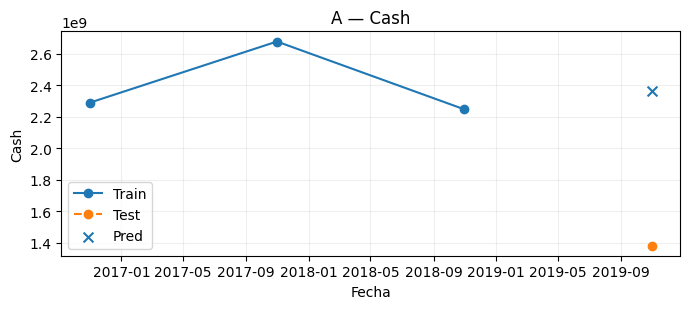

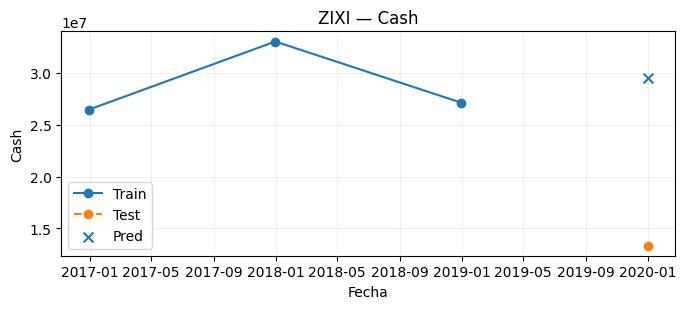

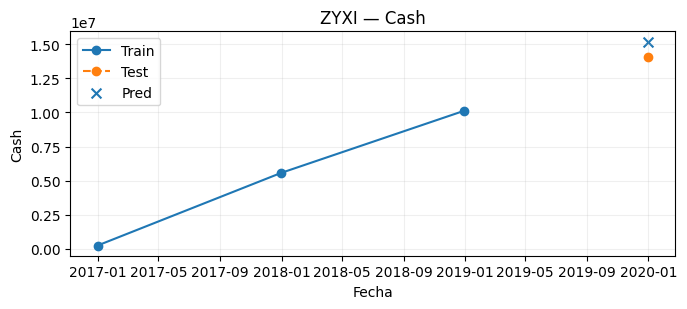

Guardados individuales: ['reg_plot_real_vs_pred_A.png', 'reg_plot_real_vs_pred_ZIXI.png', 'reg_plot_real_vs_pred_ZYXI.png']


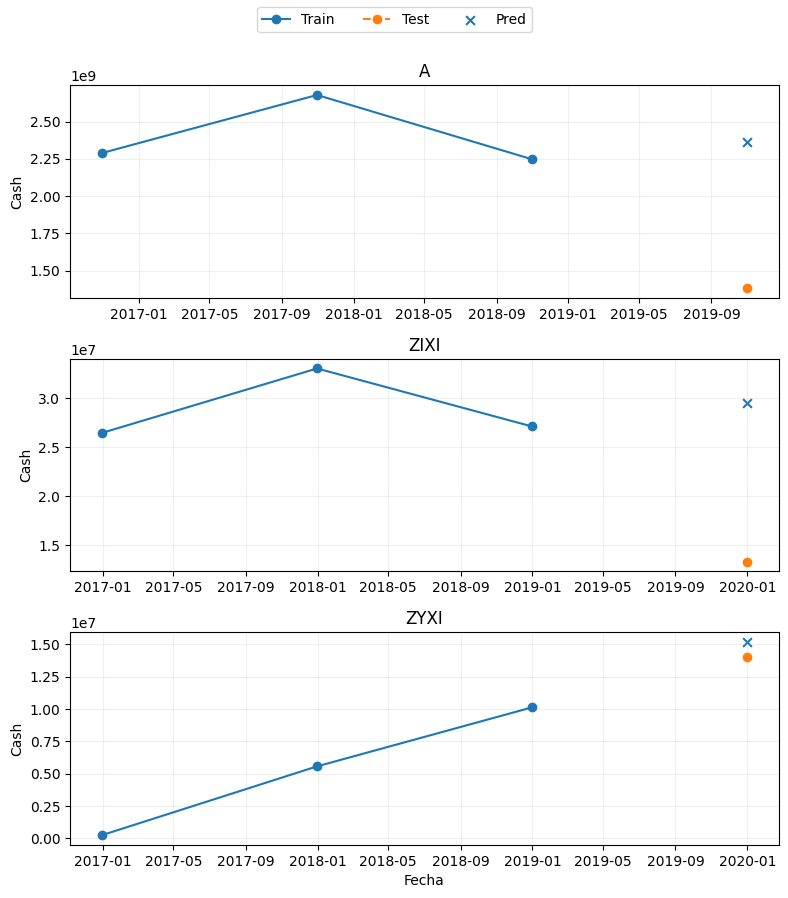

Panel guardado: reg_plots_real_vs_pred_all.png


In [ ]:
# PASO 7 — Verificación visual: Real vs Predicho

import os, pandas as pd, numpy as np, matplotlib.pyplot as plt

dataset = globals().get("dataset", pd.read_csv("reg_dataset_80_20.csv", parse_dates=["endDate"]))
preds   = pd.read_csv("reg_predictions_test.csv", parse_dates=["endDate"]) if os.path.exists("reg_predictions_test.csv") \
         else pd.DataFrame(columns=["stock","endDate","cash","y_pred"])

stocks = list(dict.fromkeys(dataset["stock"]))
saved = []

# Figuras individuales
for s in stocks:
    d  = dataset.query("stock == @s").sort_values("endDate")
    tr = d[d["split"]=="train"]; te = d[d["split"]=="test"]
    p  = preds.query("stock == @s").sort_values("endDate") if len(preds) else pd.DataFrame()

    plt.figure(figsize=(7,3.2))
    if len(tr): plt.plot(tr["endDate"], tr["cash"], "o-", label="Train")
    if len(te): plt.plot(te["endDate"], te["cash"], "o--", label="Test")
    if len(p):  plt.scatter(p["endDate"], p["y_pred"], s=50, marker="x", label="Pred")
    plt.title(f"{s} — Cash"); plt.xlabel("Fecha"); plt.ylabel("Cash")
    plt.grid(alpha=.2); plt.legend(); plt.tight_layout()
    out = f"reg_plot_real_vs_pred_{s}.png"; plt.savefig(out, dpi=150); plt.show()
    saved.append(out)

print("Guardados individuales:", saved)

# Panel combinado
if len(stocks) >= 2:
    n = len(stocks)
    fig, axs = plt.subplots(n, 1, figsize=(8, 3*n), sharex=False)
    if n == 1: axs = [axs]
    for ax, s in zip(axs, stocks):
        d  = dataset.query("stock == @s").sort_values("endDate")
        tr = d[d["split"]=="train"]; te = d[d["split"]=="test"]
        p  = preds.query("stock == @s").sort_values("endDate") if len(preds) else pd.DataFrame()
        if len(tr): ax.plot(tr["endDate"], tr["cash"], "o-", label="Train")
        if len(te): ax.plot(te["endDate"], te["cash"], "o--", label="Test")
        if len(p):  ax.scatter(p["endDate"], p["y_pred"], s=40, marker="x", label="Pred")
        ax.set_title(s); ax.set_ylabel("Cash"); ax.grid(alpha=.2)
    axs[-1].set_xlabel("Fecha")
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncols=3)
    fig.tight_layout(rect=[0,0,1,0.95])
    fig.savefig("reg_plots_real_vs_pred_all.png", dpi=150); plt.show()
    print("Panel guardado: reg_plots_real_vs_pred_all.png")


# Paso 8 — Verificación de modelos (MSE, RMSE, R2)

Instrucciones breves:
- Asegúrese de tener para cada empresa: y_test (valores reales) y y_pred (predicciones).
- Calcular métricas con sklearn: mean_squared_error(y_test, y_pred), RMSE = sqrt(MSE), r2_score(y_test, y_pred).
- Presentar los resultados en una tabla por empresa y añadir una conclusión corta.

Empresa 1 (ticker: AAA)
| Métrica | Valor |
|---|---|
| MSE |  |
| RMSE |  |
| R2 |  |

Empresa 2 (ticker: BBB)
| Métrica | Valor |
|---|---|
| MSE |  |
| RMSE |  |
| R2 |  |

Empresa 3 (ticker: CCC)
| Métrica | Valor |
|---|---|
| MSE |  |
| RMSE |  |
| R2 |  |

Pequeña conclusión:
- Comparar RMSE/MSE absolutos para evaluar error en unidades de `cash`; RMSE más bajo = mejor precisión.
- R2 indica proporción de varianza explicada (cercano a 1 → buen ajuste; cercano a 0 o negativo → mal ajuste).
- Si alguno de los modelos muestra RMSE alto o R2 bajo, considerar: más features (rezagos, variables temporales), regularización, transformación de la serie o modelos no lineales.

In [15]:
# PASO 8 — Métricas (MSE, RMSE, MAE, MAPE, R²) por stock y global

import os, pandas as pd, numpy as np
from sklearn.metrics import mean_squared_error, r2_score

if not os.path.exists("reg_predictions_test.csv"):
    raise FileNotFoundError("No existe reg_predictions_test.csv. Ejecuta el Paso 6 (predicciones) primero.")

preds = pd.read_csv("reg_predictions_test.csv", parse_dates=["endDate"])
if preds.empty:
    raise ValueError("reg_predictions_test.csv está vacío. Revisa el Paso 6.")

def safe_metrics(y, yhat):
    y = np.asarray(y, dtype=float); yhat = np.asarray(yhat, dtype=float)
    mse  = mean_squared_error(y, yhat)
    rmse = np.sqrt(mse)
    mae  = np.mean(np.abs(y - yhat))
    mape = np.mean(np.abs(y - yhat) / np.maximum(np.abs(y), 1e-12)) * 100
    r2   = r2_score(y, yhat) if (len(y) >= 2 and np.var(y) > 0) else np.nan  # R² sólo si es válido
    return mse, rmse, mae, mape, r2

rows = []
for s, g in preds.groupby("stock", sort=False):
    mse, rmse, mae, mape, r2 = safe_metrics(g["cash"], g["y_pred"])
    rows.append({"stock": s, "n_test": len(g), "MSE": mse, "RMSE": rmse, "MAE": mae, "MAPE_%": mape, "R2": r2})

per_stock = pd.DataFrame(rows).sort_values("stock")
display(per_stock)

# Métricas globales (todo el test junto)
mse_g, rmse_g, mae_g, mape_g, r2_g = safe_metrics(preds["cash"], preds["y_pred"])
overall = pd.DataFrame([{"stock":"ALL","n_test":len(preds),"MSE":mse_g,"RMSE":rmse_g,"MAE":mae_g,"MAPE_%":mape_g,"R2":r2_g}])
display(overall)

# Guardar
out = pd.concat([per_stock, overall], ignore_index=True)
out.to_csv("reg_metrics.csv", index=False)
print("Guardado: reg_metrics.csv")

# (Opcional) ver dónde más se equivoca
preds["abs_err"] = (preds["cash"] - preds["y_pred"]).abs()
display(preds.nlargest(5, "abs_err")[["stock","endDate","cash","y_pred","abs_err"]])

# (Opcional) aviso de R² no definido
prob = per_stock.loc[(per_stock["n_test"] < 2) | per_stock["R2"].isna(), ["stock","n_test"]]
if not prob.empty:
    print("Aviso: estos stocks tienen <2 filas de test o varianza≈0 (R²=NaN):")
    display(prob)


,stock,n_test,MSE,RMSE,MAE,MAPE_%,R2
0,A,1,9.617071e+17,9.806667e+08,9.806667e+08,70.959961,NaN
1,ZIXI,1,2.611887e+14,1.616133e+07,1.616133e+07,121.067745,NaN
2,ZYXI,1,1.332485e+12,1.154333e+06,1.154333e+06,8.221747,NaN


,stock,n_test,MSE,RMSE,MAE,MAPE_%,R2
0,ALL,3,3.206565e+17,5.662654e+08,3.326608e+08,66.749818,0.229298


Guardado: reg_metrics.csv


,stock,endDate,cash,y_pred,abs_err
0,A,2019-10-31,1.382000e+09,2.362667e+09,9.806667e+08
1,ZIXI,2019-12-31,1.334900e+07,2.951033e+07,1.616133e+07
2,ZYXI,2019-12-31,1.404000e+07,1.519433e+07,1.154333e+06


Aviso: estos stocks tienen <2 filas de test o varianza≈0 (R²=NaN):


,stock,n_test
0,A,1
1,ZIXI,1
2,ZYXI,1


## Preguntas de Analisis 

1. ¿Qué variables (features) usaste para predecir `cash` y por qué crees que son relevantes?
2. ¿Cómo realizaste la división temporal 80/20 por empresa y por qué es importante no barajar (shuffle) los datos en series temporales?
3. ¿Cuál es la diferencia entre MSE y RMSE y qué nos dice cada métrica sobre la precisión de las predicciones?
4. ¿Qué interpreta el valor de R² en este problema (predicción de `cash`) y qué limitaciones tiene su interpretación en series temporales?
5. Si obtienes un RMSE alto o un R² bajo, ¿qué acciones concretas propondrías para mejorar el modelo (p. ej. features, rezagos, transformaciones, modelos alternativos)?

1.Usé endDate convertida a número (ordinal) como única feature para capturar la tendencia temporal del cash; es simple y refleja crecimientos/disminuciones, aunque no modela shocks ni otras relaciones contables.

2.Para cada empresa, ordené por fecha ascendente y tomé 80% inicial como train y 20% final como test (evitando shuffle). No se baraja porque mezclar pasado y futuro rompe el orden temporal y produce fuga de información y métricas irreales.

3.El MSE es el promedio de los errores al cuadrado (penaliza mucho los errores grandes). El RMSE es la raíz del MSE y queda en las mismas unidades que cash, por lo que se interpreta como “error típico”. En ambos, menor es mejor.

4.R² mide la fracción de variabilidad del cash explicada por el modelo frente a predecir el promedio (≈1 bueno, ≈0 similar al promedio, <0 peor). Limitaciones: con muy pocos datos o varianza casi nula en test puede ser NaN/engañosa; además, en series con tendencia común puede inflarse sin que el modelo anticipe cambios.

5.Añadir features (otras cuentas, ratios), incluir rezagos de cash y tasas de crecimiento, aplicar transformaciones (escala a millones, log si procede, diferencias), probar modelos con regularización (Ridge/Lasso/ElasticNet), árboles/boosting o de series de tiempo (ARIMA/Prophet, TimeSeriesSplit), mejorar calidad de datos (tratar outliers, ampliar historial) y mantener validación temporal sin shuffle.